In [150]:
import pandas as pd

train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [151]:
train_df.drop('Loan_ID', axis=1, inplace=True)
test_df.drop('Loan_ID', axis=1, inplace=True)

In [134]:
#train_df = train_df[train_df.isnull().sum(axis=1) < 3]

In [152]:
for col in ["Gender", "Married", "Dependents", "Self_Employed", "Loan_Amount_Term", "Credit_History"]:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

In [153]:
train_df.LoanAmount = train_df.LoanAmount.fillna(train_df.LoanAmount.median())

In [154]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

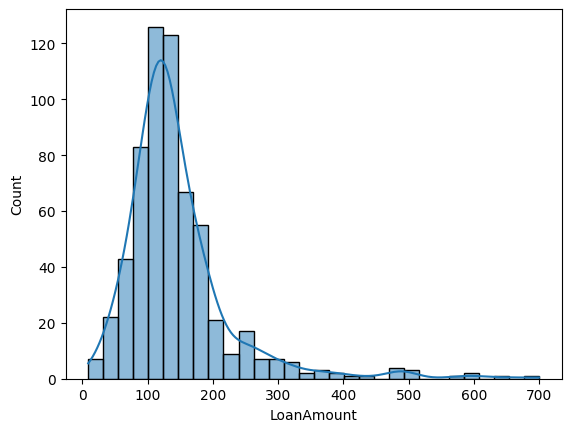

In [11]:
sns.histplot(train_df.LoanAmount, bins=30, kde=True)
plt.show()

In [155]:
train_df["Total_income"] = train_df["ApplicantIncome"] + train_df["CoapplicantIncome"]

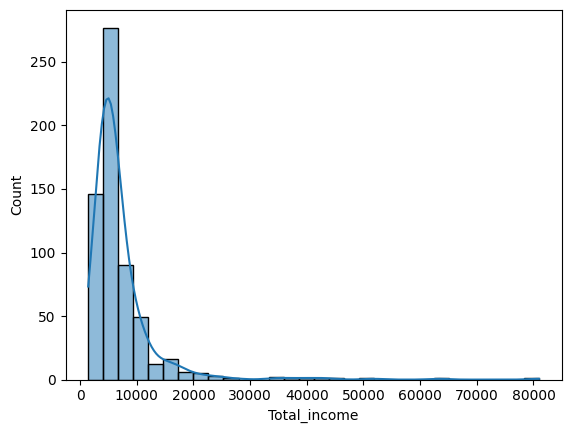

In [13]:
sns.histplot(train_df.Total_income, bins=30, kde=True)
plt.show()

In [156]:
# Income-to-Loan Ratio
# This feature captures how much burden the loan is compared to the applicant’s income.
# A lower ratio might indicate higher chances of approval.

train_df["Income_Loan_Ratio"] = train_df["Total_income"] / train_df["LoanAmount"]

In [157]:
# EMI (Equated Monthly Installment)
# Helps determine how much of their monthly income goes toward the loan.
# Higher EMI might indicate a riskier loan.

train_df["EMI"] = train_df["LoanAmount"] / train_df["Loan_Amount_Term"]

In [158]:
# Loan-to-Income Ratio
# This helps identify how much the loan is relative to income.

train_df["Loan_to_Income"] = train_df["LoanAmount"] / train_df["Total_income"]

In [159]:
train_df.LoanAmount = np.log1p(train_df.LoanAmount)
train_df.Total_income = np.log1p(train_df.Total_income)

In [18]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Income_Loan_Ratio,EMI,Loan_to_Income
0,Male,No,0,Graduate,No,5849,0.0,4.859812,360.0,1.0,Urban,Y,8.674197,45.695312,0.355556,0.021884
1,Male,Yes,1,Graduate,No,4583,1508.0,4.859812,360.0,1.0,Rural,N,8.714732,47.585938,0.355556,0.021015
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.204693,360.0,1.0,Urban,Y,8.006701,45.454545,0.183333,0.022000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,4.795791,360.0,1.0,Urban,Y,8.505525,41.175000,0.333333,0.024287
4,Male,No,0,Graduate,No,6000,0.0,4.955827,360.0,1.0,Urban,Y,8.699681,42.553191,0.391667,0.023500


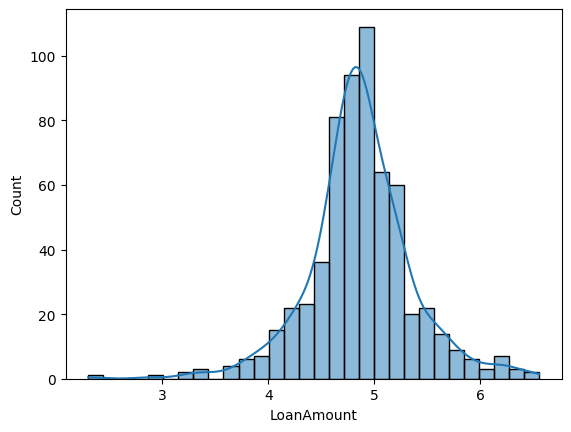

In [19]:
sns.histplot(train_df.LoanAmount, bins=30, kde=True)
plt.show()

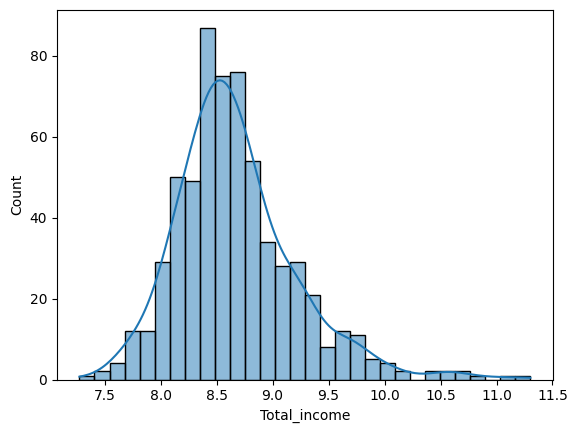

In [20]:
sns.histplot(train_df.Total_income, bins=30, kde=True)
plt.show()

In [139]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Total_income',
       'Income_Loan_Ratio', 'EMI', 'Loan_to_Income', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

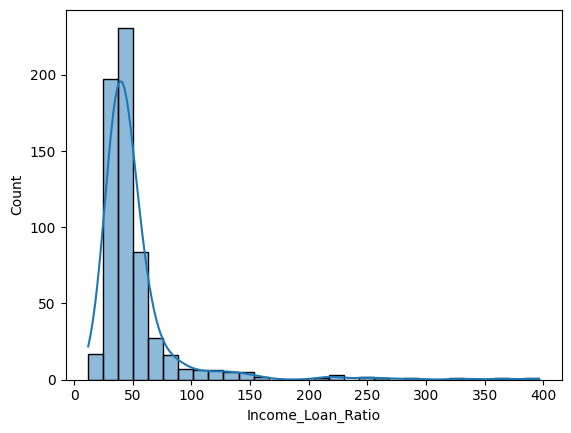

In [140]:
sns.histplot(train_df.Income_Loan_Ratio, bins=30, kde=True)
plt.show()

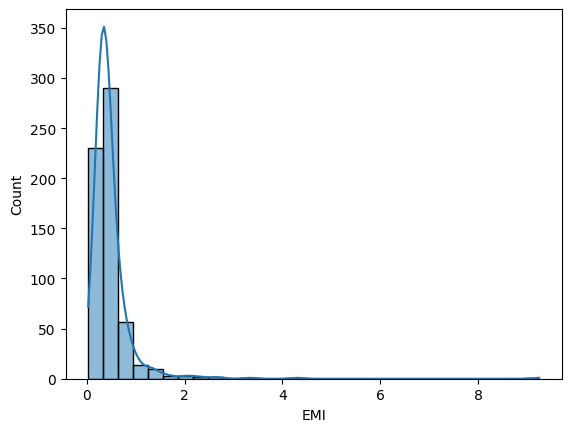

In [141]:
sns.histplot(train_df.EMI, bins=30, kde=True)
plt.show()

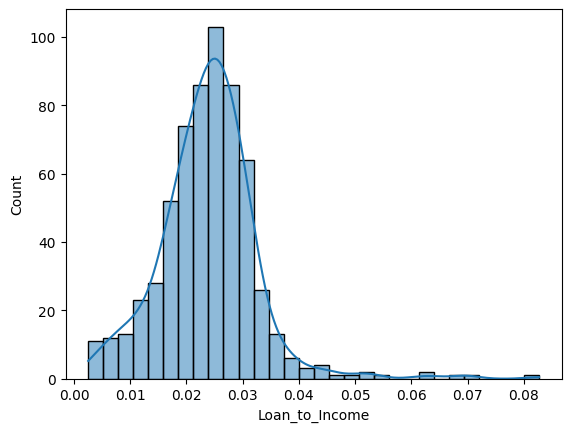

In [142]:
sns.histplot(train_df.Loan_to_Income, bins=30, kde=True)
plt.show()

In [160]:
train_df.Income_Loan_Ratio = np.log1p(train_df.Income_Loan_Ratio)
train_df.Loan_to_Income = np.log1p(train_df.Loan_to_Income)
train_df.EMI = np.log1p(train_df.EMI)

In [161]:
test_df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [163]:
for col in ["Gender", "Dependents", "Self_Employed", "Loan_Amount_Term", "Credit_History"]:
    test_df[col] = test_df[col].fillna(train_df[col].mode()[0])

test_df.LoanAmount = test_df.LoanAmount.fillna(train_df.LoanAmount.median())

In [165]:
test_df["Total_income"] = test_df["ApplicantIncome"] + test_df["CoapplicantIncome"]
test_df["Income_Loan_Ratio"] = test_df["Total_income"] / test_df["LoanAmount"]
test_df["EMI"] = test_df["LoanAmount"] / test_df["Loan_Amount_Term"]
test_df["Loan_to_Income"] = test_df["LoanAmount"] / test_df["Total_income"]

In [166]:
import numpy as np

test_df.LoanAmount = np.log1p(test_df.LoanAmount)
test_df.Total_income = np.log1p(test_df.Total_income)
train_df.Income_Loan_Ratio = np.log1p(train_df.Income_Loan_Ratio)
train_df.Loan_to_Income = np.log1p(train_df.Loan_to_Income)
train_df.EMI = np.log1p(train_df.EMI)

In [11]:
for column in train_df.select_dtypes(include=['object']).columns:
    print(f"Value counts for '{column}':\n{train_df[column].value_counts()}\n{'-'*40}")

Value counts for 'Gender':
Gender
Male      502
Female    112
Name: count, dtype: int64
----------------------------------------
Value counts for 'Married':
Married
Yes    401
No     213
Name: count, dtype: int64
----------------------------------------
Value counts for 'Dependents':
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
----------------------------------------
Value counts for 'Education':
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
----------------------------------------
Value counts for 'Self_Employed':
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
----------------------------------------
Value counts for 'Property_Area':
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
----------------------------------------
Value counts for 'Loan_Status':
Loan_Status
Y    422
N    192
Name: count, dtype: int64
----------------------------------------


In [167]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df['Gender'] = le.fit_transform(train_df['Gender']) 
train_df['Married'] = le.fit_transform(train_df['Married']) 
train_df['Education'] = le.fit_transform(train_df['Education']) 
train_df['Self_Employed'] = le.fit_transform(train_df['Self_Employed']) 
train_df['Loan_Status'] = le.fit_transform(train_df['Loan_Status']) 

test_df['Gender'] = le.fit_transform(test_df['Gender']) 
test_df['Married'] = le.fit_transform(test_df['Married']) 
test_df['Education'] = le.fit_transform(test_df['Education']) 
test_df['Self_Employed'] = le.fit_transform(test_df['Self_Employed']) 

In [168]:
train_df.Dependents = train_df.Dependents.replace({'0':0, '1':1, '2':2, '3+':3})
test_df.Dependents = test_df.Dependents.replace({'0':0, '1':1, '2':2, '3+':3})

C:\Users\Risaal Khan\AppData\Local\Temp\ipykernel_15592\3161566924.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df.Dependents = train_df.Dependents.replace({'0':0, '1':1, '2':2, '3+':3})
C:\Users\Risaal Khan\AppData\Local\Temp\ipykernel_15592\3161566924.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df.Dependents = test_df.Dependents.replace({'0':0, '1':1, '2':2, '3+':3})


In [169]:
train_df = pd.get_dummies(train_df, columns=['Property_Area'])
test_df = pd.get_dummies(test_df, columns=['Property_Area'])

# Model Building

In [18]:
#pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [171]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

In [172]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Loan_Status', axis=1)
y = train_df.Loan_Status

y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [173]:
X, y = smote.fit_resample(X, y)

In [174]:
y.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [177]:
print(X_train.shape)
print(X_test.shape)

(675, 17)
(169, 17)


In [176]:
y_train.value_counts()

Loan_Status
1    338
0    337
Name: count, dtype: int64

In [178]:
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

print("Train size after SMOTE:", X_train.shape[0])

Train size after SMOTE: 676


In [179]:
y_train.value_counts()

Loan_Status
0    338
1    338
Name: count, dtype: int64

### Decision Tree

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [181]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
best_clf = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [182]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_clf, X_train, y_train, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [0.80882353 0.78518519 0.71851852 0.84444444 0.76296296]
Mean cross-validation score: 0.7839869281045753


In [183]:
pred = best_clf.predict(X_test)
pd.Series(pred).value_counts()

1    90
0    79
Name: count, dtype: int64

In [184]:
pd.crosstab(y_test, pred)

col_0,0,1
Loan_Status,,
0,69,16
1,10,74


In [185]:
np.mean(y_test==pred)

np.float64(0.8461538461538461)

In [186]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        85
           1       0.82      0.88      0.85        84

    accuracy                           0.85       169
   macro avg       0.85      0.85      0.85       169
weighted avg       0.85      0.85      0.85       169



In [187]:
test_preds = best_clf.predict(test_df)
pd.Series(test_preds).value_counts()

1    303
0     64
Name: count, dtype: int64

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [200]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [5, 10],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False],  # Whether to use bootstrapped samples
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

rf = RandomForestClassifier(class_weight={0: 1.5, 1: 1}, random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='precision')
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 200}


In [201]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='precision')
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [0.84285714 0.76811594 0.7761194  0.87878788 0.81578947]
Mean cross-validation score: 0.8163339680686585


In [202]:
preds = best_rf.predict(X_test)
pd.Series(preds).value_counts()

0    85
1    84
Name: count, dtype: int64

In [203]:
pd.crosstab(y_test, preds)

col_0,0,1
Loan_Status,,
0,75,10
1,10,74


In [204]:
np.mean(y_test==preds)

np.float64(0.8816568047337278)

In [205]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        85
           1       0.88      0.88      0.88        84

    accuracy                           0.88       169
   macro avg       0.88      0.88      0.88       169
weighted avg       0.88      0.88      0.88       169



In [206]:
test_preds = best_rf.predict(test_df)
pd.Series(test_preds).value_counts()

1    253
0    114
Name: count, dtype: int64

## Feature Selection

In [207]:
importances = best_rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

In [208]:
for idx in sorted_indices:
    print(f"{X_train.columns[idx]}: {importances[idx]}")

Credit_History: 0.40707188922277016
ApplicantIncome: 0.06512771858160456
Total_income: 0.06217069466302695
EMI: 0.05607772164355459
Loan_to_Income: 0.05361322083046987
Property_Area_Rural: 0.0504143484798709
Income_Loan_Ratio: 0.04810132334353752
CoapplicantIncome: 0.0477236739378632
LoanAmount: 0.046779180301409325
Property_Area_Urban: 0.043377797339009615
Property_Area_Semiurban: 0.03822585082535932
Married: 0.03540880803930925
Loan_Amount_Term: 0.01963348503259807
Dependents: 0.014255968046934788
Gender: 0.004465740780962778
Education: 0.004184105883041071
Self_Employed: 0.0033684730486780107


In [210]:
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_df = feature_df.sort_values(by='Importance', ascending=False)

C:\Users\Risaal Khan\AppData\Local\Temp\ipykernel_15592\559781613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


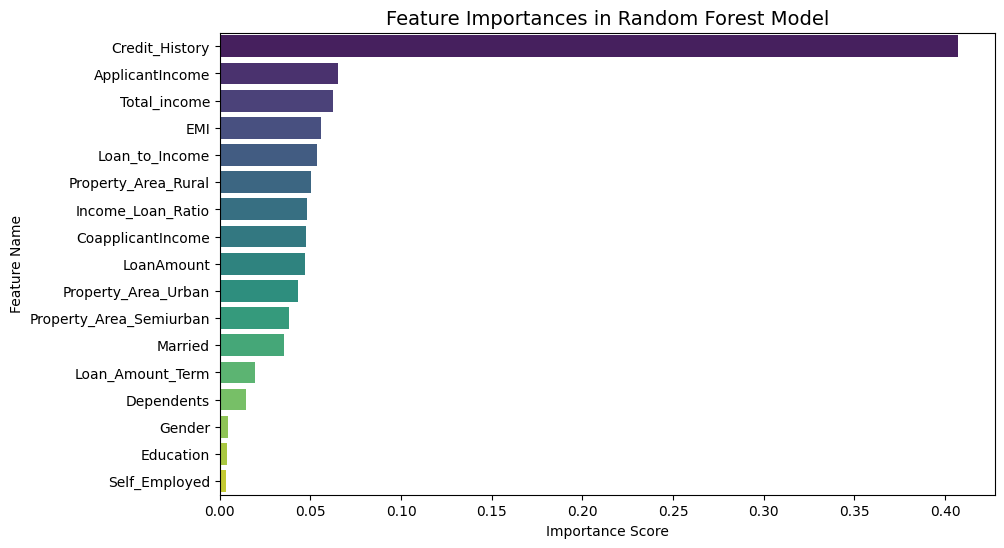

In [211]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')

plt.title('Feature Importances in Random Forest Model', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')

plt.show()

In [212]:
drop_cols = ['Gender', 'Education', 'Self_Employed', 'Dependents']

X_train = X_train.drop(columns=drop_cols)
X_test = X_test.drop(columns=drop_cols)
test_df = test_df.drop(columns=drop_cols)

In [213]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [5, 10],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False],  # Whether to use bootstrapped samples
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

rf = RandomForestClassifier(class_weight={0: 1.5, 1: 1}, random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='precision')
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [214]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='precision')
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [0.86764706 0.77777778 0.76923077 0.86153846 0.80263158]
Mean cross-validation score: 0.8157651292635812


In [215]:
preds = best_rf.predict(X_test)
pd.Series(preds).value_counts()

0    87
1    82
Name: count, dtype: int64

In [217]:
np.mean(y_test==preds)

np.float64(0.8816568047337278)

In [218]:
pd.crosstab(y_test, preds)

col_0,0,1
Loan_Status,,
0,76,9
1,11,73


In [219]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        85
           1       0.89      0.87      0.88        84

    accuracy                           0.88       169
   macro avg       0.88      0.88      0.88       169
weighted avg       0.88      0.88      0.88       169



In [220]:
test_preds = best_rf.predict(test_df)
pd.Series(test_preds).value_counts()

1    245
0    122
Name: count, dtype: int64

In [221]:
# import joblib

# joblib.dump(best_rf, 'loan_model.pkl')

['loan_model.pkl']

# 📌 Report on Model Performance and Selection

## 1️⃣ Introduction
* Objective: To predict loan approval based on applicant details.
* Models Tested: Decision Tree and Random Forest.
* Evaluation Metrics: Accuracy, Precision, Recall, Cross-validation score, and False Positives.

## 2️⃣ Model Performance Comparison

| Metric                          | Decision Tree | Random Forest | Random Forest (Feature Importance) |
|---------------------------------|--------------|--------------|----------------------------------|
| **Test Accuracy**               | 85%          | 89%          | **89%** |
| **Cross-validation Score**      | 78%          | 82%        | **82%** |
| **Precision (Negative)** | 87%      | 88%          | **87%** |
| **Precision (Positive)** | 82%      | 88%          | **89%** |
| **Recall (Negative)** | 81%      | 88%          | **89%** |
| **Recall (Positive)** | 88%      | 88%          | **88%** |
| **False Positives (Loans wrongly approved)** | 16 | 10 | **9 (Best!)** |

✅ **Best Model**: Random Forest with Feature Importance (Optimized Model) 🚀

## Confusion Matrix Insights:
* Random Forest had fewer false positives, making it the better choice for minimizing risky loan approvals.
* Decision Tree performed well but overfitted slightly due to its single-tree nature.

## 3️⃣ Feature Importance Analysis
### Top 5 Influential Features in Random Forest:
* Credit History - 40.7%
* Applicant Income - 6.5%
* Total Income - 6.2%
* EMI - 5.6%
* Loan-to-Income Ratio - 5.3%

### Less Important Features:
* Gender, Education, and Self_Employed had low impact and can be reconsidered in feature selection.

## 4️⃣ Final Model Selection
Random Forest is the best model based on: 
* ✅ Higher accuracy (89%) and cross-validation score (82%)
* ✅ Lower false positives (9 instead of 16 in Decision Tree)
* ✅ Better generalization and less overfitting compared to Decision Tree